In [2]:
#one-hot encoding
"""
red, green, blue
1,   0,     0
0,   1,     0
0,   0,     1
"""

'\nred, green, blue\n1,   0,     0\n0,   1,     0\n0,   0,     1\n'

In [3]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['cold', 'cold', 'warm', 'cold', 'hot', 'warm', 'cold', 'warm', 'hot']
values = np.array(data)
print(values)

['cold' 'cold' 'warm' 'cold' 'hot' 'warm' 'cold' 'warm' 'hot']


In [4]:
#integer encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 2 0 2 1]


In [5]:
onehot_encoder = OneHotEncoder(sparse = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
print(integer_encoded)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0]
 [0]
 [2]
 [0]
 [1]
 [2]
 [0]
 [2]
 [1]]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [6]:
inverted = label_encoder.inverse_transform([np.argmax(onehot_encoded[0, :])])
print(inverted)

['cold']


In [7]:
#Convolutional Neural Network

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

In [10]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

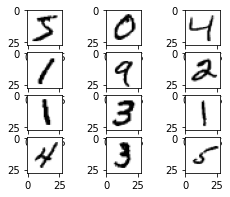

In [11]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [13]:
y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

In [14]:
X_train = X_train / 255
X_test = X_test / 255

In [17]:
#Keras modelimizi oluşturma
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

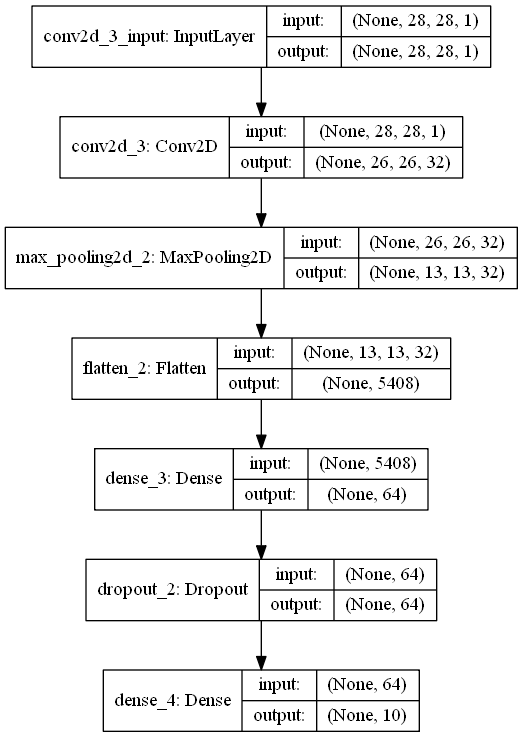

In [19]:
tf.keras.utils.plot_model(model, "yz1010-mnist.png", show_shapes = True, show_layer_names = True)

In [20]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 58s - loss: 0.3551 - accuracy: 0.8917 - val_loss: 0.1125 - val_accuracy: 0.9668
Epoch 2/5
 - 42s - loss: 0.1766 - accuracy: 0.9465 - val_loss: 0.0886 - val_accuracy: 0.9742
Epoch 3/5
 - 41s - loss: 0.1402 - accuracy: 0.9568 - val_loss: 0.0906 - val_accuracy: 0.9744
Epoch 4/5
 - 41s - loss: 0.1144 - accuracy: 0.9640 - val_loss: 0.0725 - val_accuracy: 0.9807
Epoch 5/5
 - 40s - loss: 0.1026 - accuracy: 0.9683 - val_loss: 0.0776 - val_accuracy: 0.9804


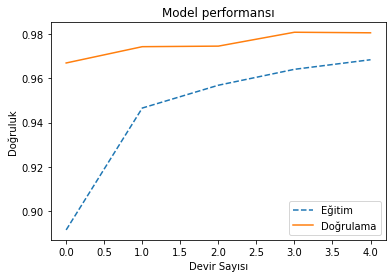

In [21]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "lower right")
plt.show()

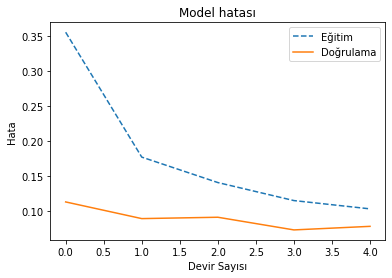

In [22]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [23]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Test Performansı : %.2f%%" % (performans[1]*100))

Modelin Test Performansı : 97.89%


In [24]:
#Recurrent Neural Networks

In [25]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN
from keras.preprocessing import sequence

In [26]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [27]:
print(X_train.shape)

(25000,)


In [28]:
print(X_test.shape)

(25000,)


In [30]:
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = 500)
X_test = sequence.pad_sequences(X_test, maxlen = 500)
print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [31]:
X_train.shape

(25000, 500)

In [32]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

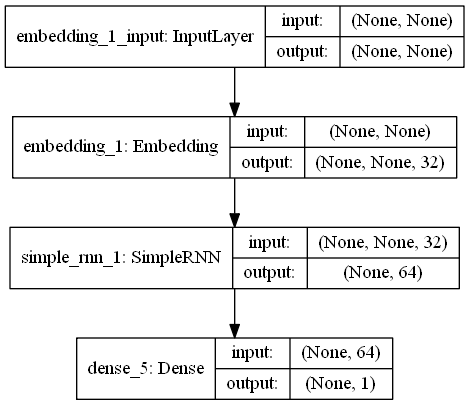

In [35]:
tf.keras.utils.plot_model(model, "yz1010-rnn.png", show_shapes = True, show_layer_names = True)

In [36]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 44s 2ms/step - loss: 0.6798 - accuracy: 0.5617 - val_loss: 0.6759 - val_accuracy: 0.5784
Epoch 2/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.6284 - accuracy: 0.6938 - val_loss: 0.5650 - val_accuracy: 0.7364
Epoch 3/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.4182 - accuracy: 0.8280 - val_loss: 0.4433 - val_accuracy: 0.8006
Epoch 4/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.3401 - accuracy: 0.8587 - val_loss: 0.3911 - val_accuracy: 0.8352
Epoch 5/10
20000/20000 [==============================] - 39s 2ms/step - loss: 0.2537 - accuracy: 0.8980 - val_loss: 0.3685 - val_accuracy: 0.8372
Epoch 6/10
20000/20000 [==============================] - 41s 2ms/step - loss: 0.1895 - accuracy: 0.9318 - val_loss: 0.3754 - val_accuracy: 0.8514
Epoch 7/10
20000/20000 [==============================] - 40s 2ms/ste

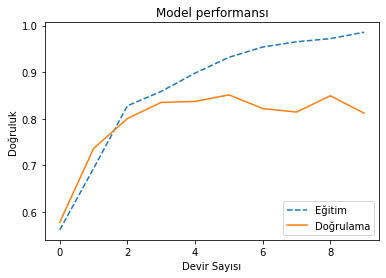

In [37]:
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "lower right")
plt.show()

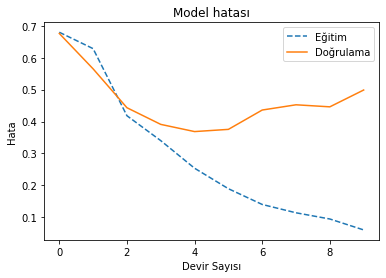

In [38]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = "upper right")
plt.show()

In [39]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin Doğruluğu : %.2f%%" % (performans[1]*100))

Modelin Doğruluğu : 81.18%
